In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("WSN-DS.csv")
df

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,DATA_R,Data_Sent_To_BS,dist_CH_To_BS,send_code,Expaned Energy,Attack type
0,101000,50,1,101000,0.00000,1,0,0,25,1,0,0,0,1200,48,130.08535,0,2.46940,Normal
1,101001,50,0,101044,75.32345,0,4,1,0,0,1,2,38,0,0,0.00000,4,0.06957,Normal
2,101002,50,0,101010,46.95453,0,4,1,0,0,1,19,41,0,0,0.00000,3,0.06898,Normal
3,101003,50,0,101044,64.85231,0,4,1,0,0,1,16,38,0,0,0.00000,4,0.06673,Normal
4,101004,50,0,101010,4.83341,0,4,1,0,0,1,25,41,0,0,0.00000,3,0.06534,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374656,201096,1003,0,201051,6.98337,0,5,1,0,0,1,7,96,0,67,170.14779,3,0.15974,Normal
374657,201097,1003,0,201037,29.32867,0,5,1,0,0,1,31,39,0,24,82.21043,2,0.06877,Normal
374658,201098,1003,0,201095,18.51963,0,5,1,0,0,1,17,55,0,31,139.26438,1,0.09437,Normal
374659,201099,1003,0,201051,8.55001,0,5,1,0,0,1,3,96,0,65,158.27492,3,0.16047,Normal


In [3]:
print(df.columns)
df.rename(columns={"Attack type":"Attack_type"},inplace=True)
print(df['Attack_type'].value_counts())

Index([' id', ' Time', ' Is_CH', ' who CH', ' Dist_To_CH', ' ADV_S', ' ADV_R',
       ' JOIN_S', ' JOIN_R', ' SCH_S', ' SCH_R', 'Rank', ' DATA_S', ' DATA_R',
       ' Data_Sent_To_BS', ' dist_CH_To_BS', ' send_code ', 'Expaned Energy',
       'Attack type'],
      dtype='object')
Attack_type
Normal       340066
Grayhole      14596
Blackhole     10049
TDMA           6638
Flooding       3312
Name: count, dtype: int64


### FEATURE SELECTION

In [4]:
X=df.iloc[:,:-1].values
def gini_index(y):
    _, counts = np.unique(y, return_counts=True)
    probs = counts / len(y)
    gini = 1 - np.sum(probs**2)
    return gini
for i in range(X.shape[1]):
    feature_values = X[:, i]
    gini = gini_index(feature_values)
    print(f'Gini index for feature {i}: {gini}')

Gini index for feature 0: 0.9997816800728752
Gini index for feature 1: 0.9778172056662011
Gini index for feature 2: 0.2047284446396589
Gini index for feature 3: 0.9990699280005614
Gini index for feature 4: 0.9513716580941377
Gini index for feature 5: 0.20689052230563898
Gini index for feature 6: 0.9087453895207591
Gini index for feature 7: 0.3433063437139978
Gini index for feature 8: 0.09809245937003586
Gini index for feature 9: 0.09689749930411085
Gini index for feature 10: 0.377535315963361
Gini index for feature 11: 0.884475240755078
Gini index for feature 12: 0.9527553242851903
Gini index for feature 13: 0.27396878561404814
Gini index for feature 14: 0.31136934574420516
Gini index for feature 15: 0.3236758130796613
Gini index for feature 16: 0.8471000639692639
Gini index for feature 17: 0.9998994080359344


In [5]:
df.drop(' DATA_R',axis=1,inplace=True)
df.drop(' dist_CH_To_BS',axis=1,inplace=True)

In [6]:
print(df.isnull().sum())

 id                 0
 Time               0
 Is_CH              0
 who CH             0
 Dist_To_CH         0
 ADV_S              0
 ADV_R              0
 JOIN_S             0
 JOIN_R             0
 SCH_S              0
 SCH_R              0
Rank                0
 DATA_S             0
 Data_Sent_To_BS    0
 send_code          0
Expaned Energy      0
Attack_type         0
dtype: int64


### From the above cells, there is no null values. So we can directly proceed to next step in preprocessing ie Feature scaling and encoding

In [7]:
df['Attack_type']=LabelEncoder().fit_transform(df['Attack_type'])
df.info()
df['Attack_type'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   Data_Sent_To_BS  374661 non-null  int64  
 14   send_code        374661 non-null  int64  
 15  Expaned Energy    374661 non-null  float64
 16  Attack_type       37

Attack_type
3    340066
2     14596
0     10049
4      6638
1      3312
Name: count, dtype: int64

In [8]:
x=df.iloc[:,:-1].values
x=StandardScaler().fit_transform(x)
y=df.iloc[:,-1].values
display(x)

array([[-0.44619185, -1.12794353,  2.76371415, ...,  2.20693468,
        -1.03764473,  3.23206228],
       [-0.44618929, -1.12794353, -0.36183192, ..., -0.23219768,
         0.62394481, -0.35265807],
       [-0.44618672, -1.12794353, -0.36183192, ..., -0.23219768,
         0.20854742, -0.35353938],
       ...,
       [-0.18946319, -0.06863676, -0.36183192, ...,  1.3430753 ,
        -0.62224735, -0.31561334],
       [-0.18946063, -0.06863676, -0.36183192, ...,  3.07079406,
         0.20854742, -0.21687717],
       [-0.18704461, -0.04418266, -0.36183192, ...,  0.12350912,
        -1.03764473,  1.05695382]])

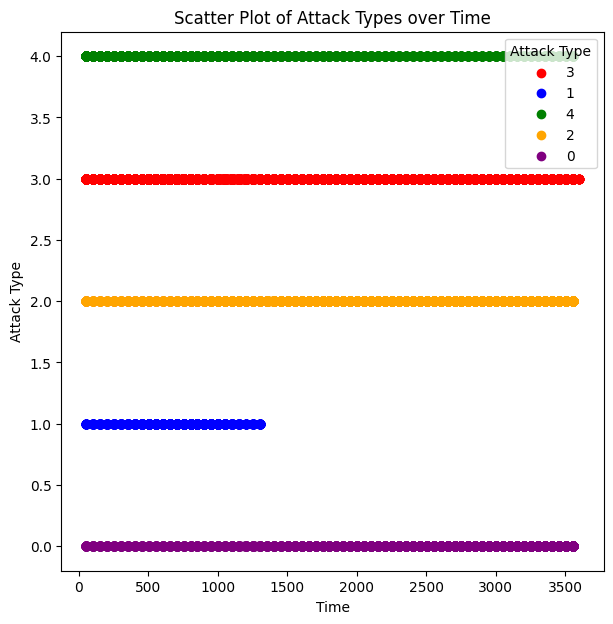

In [9]:
colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(7, 7))
for i, attack_type in enumerate(df['Attack_type'].unique()):
    subset_df = df[df['Attack_type'] == attack_type]
    plt.scatter(subset_df[' Time'], subset_df['Attack_type'], label=attack_type, color=colors[i])

plt.legend(title='Attack Type')

plt.xlabel('Time')
plt.ylabel('Attack Type')
plt.title('Scatter Plot of Attack Types over Time')

plt.show()

### red - Normal, blue-grayhole, green-TDMA ,yellow-Flooding, purple-Blackhole

### we can see that based on time itself we cannot classify it as at every time stamp there are many types of dos attack type

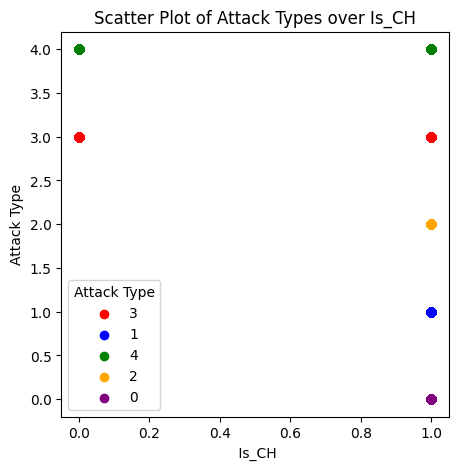

In [10]:
colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.figure(figsize=(5, 5))
for i, attack_type in enumerate(df['Attack_type'].unique()):
    subset_df = df[df['Attack_type'] == attack_type]
    plt.scatter(subset_df[' Is_CH'], subset_df['Attack_type'], label=attack_type, color=colors[i])

plt.legend(title='Attack Type')

plt.xlabel(' Is_CH')
plt.ylabel('Attack Type')
plt.title('Scatter Plot of Attack Types over Is_CH')

plt.show()

### CORRELATION USING HEAT MAP

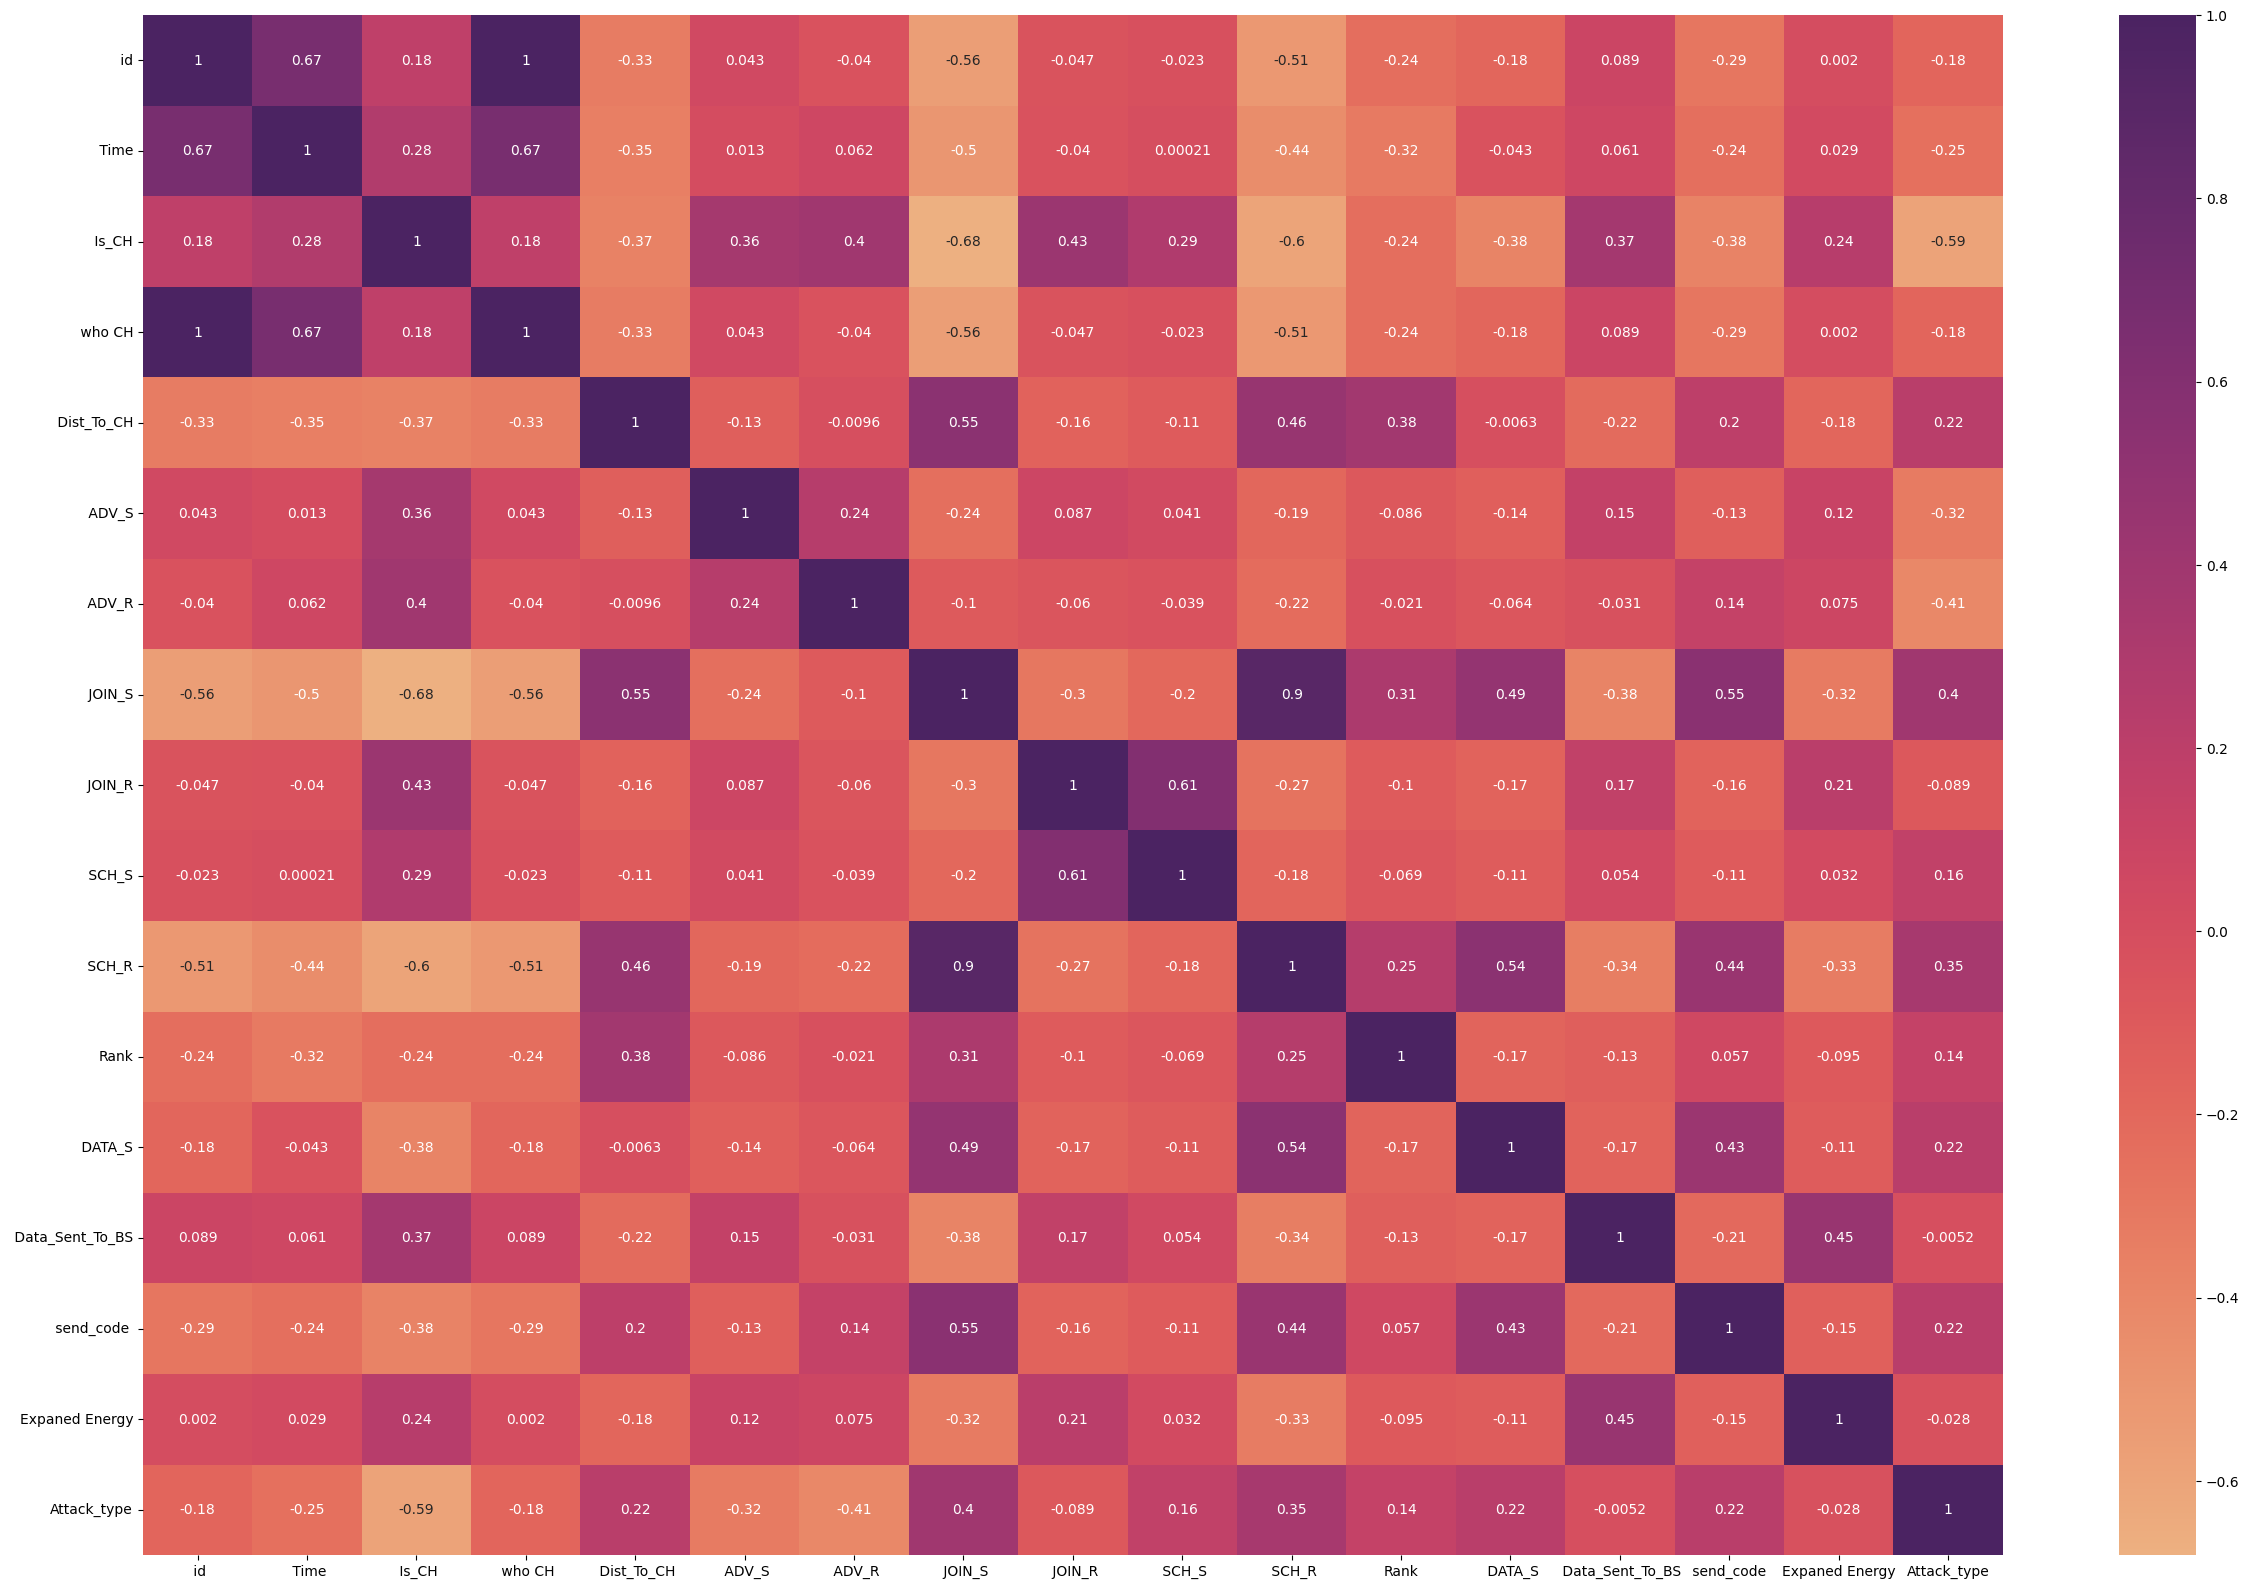

In [11]:
corr = df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr,annot=True,cmap='flare')
plt.show()

### PRINTING THE CORRELATION MATRIX

In [12]:
corr.abs()

,id,Time,Is_CH,who CH,Dist_To_CH,ADV_S,ADV_R,JOIN_S,JOIN_R,SCH_S,SCH_R,Rank,DATA_S,Data_Sent_To_BS,send_code,Expaned Energy,Attack_type
id,1.000000,0.674170,0.179659,1.000000,0.329638,0.042635,0.039515,0.561031,0.046773,0.023138,0.510604,0.239057,0.183151,0.088892,0.291817,0.001999,0.177997
Time,0.674170,1.000000,0.282040,0.674184,0.352468,0.012819,0.061591,0.502793,0.039882,0.000210,0.439315,0.316458,0.042900,0.061050,0.242577,0.028775,0.250959
Is_CH,0.179659,0.282040,1.000000,0.179665,0.372439,0.358947,0.399472,0.681119,0.434253,0.289925,0.601437,0.238737,0.381239,0.365186,0.375453,0.236316,0.590267
who CH,1.000000,0.674184,0.179665,1.000000,0.329650,0.042634,0.039512,0.561048,0.046774,0.023138,0.510622,0.239066,0.183153,0.088896,0.291824,0.002007,0.178002
Dist_To_CH,0.329638,0.352468,0.372439,0.329650,1.000000,0.133686,0.009616,0.546805,0.161619,0.107979,0.458355,0.382459,0.006305,0.217098,0.198440,0.182533,0.220053
ADV_S,0.042635,0.012819,0.358947,0.042634,0.133686,1.000000,0.239682,0.244485,0.086911,0.040939,0.188804,0.085694,0.136844,0.149805,0.134768,0.119152,0.320874
ADV_R,0.039515,0.061591,0.399472,0.039512,0.009616,0.239682,1.000000,0.099586,0.059558,0.038879,0.223524,0.020825,0.064312,0.030728,0.143532,0.074849,0.406073
JOIN_S,0.561031,0.502793,0.681119,0.561048,0.546805,0.244485,0.099586,1.000000,0.295760,0.197473,0.897659,0.313790,0.486601,0.381757,0.551230,0.324784,0.402394
JOIN_R,0.046773,0.039882,0.434253,0.046774,0.161619,0.086911,0.059558,0.295760,1.000000,0.611823,0.270283,0.103712,0.165314,0.165065,0.162926,0.213972,0.089452
SCH_S,0.023138,0.000210,0.289925,0.023138,0.107979,0.040939,0.038879,0.197473,0.611823,1.000000,0.180473,0.069216,0.110531,0.053736,0.108853,0.032082,0.159919


### ANALYZING THE DECISIONAL ATTRIBUTE ATTACK_TYPE
## IT IS AN imbalanced DATA AND HAS TO BE SAMPLED
### 4-TDMA, 3-Normal, 2-Grayhole, 1-Flooding,0-Blackhole

<Axes: xlabel='count', ylabel='Attack_type'>

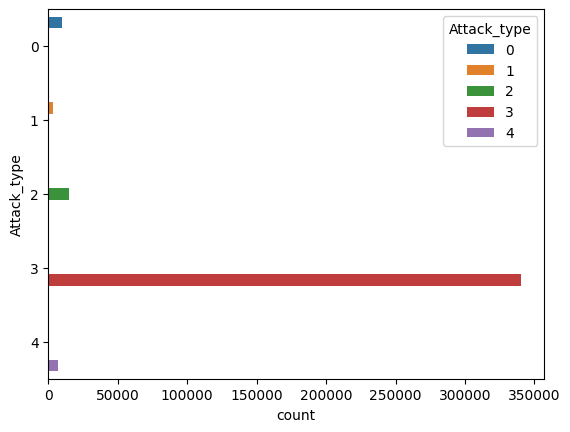

In [13]:
sns.countplot(data=df,y=df.Attack_type,hue='Attack_type')

### SPLITTING THE DATA INTO TRAINING AND TESTING

In [14]:
display(x)
display(y)

array([[-0.44619185, -1.12794353,  2.76371415, ...,  2.20693468,
        -1.03764473,  3.23206228],
       [-0.44618929, -1.12794353, -0.36183192, ..., -0.23219768,
         0.62394481, -0.35265807],
       [-0.44618672, -1.12794353, -0.36183192, ..., -0.23219768,
         0.20854742, -0.35353938],
       ...,
       [-0.18946319, -0.06863676, -0.36183192, ...,  1.3430753 ,
        -0.62224735, -0.31561334],
       [-0.18946063, -0.06863676, -0.36183192, ...,  3.07079406,
         0.20854742, -0.21687717],
       [-0.18704461, -0.04418266, -0.36183192, ...,  0.12350912,
        -1.03764473,  1.05695382]])

array([3, 3, 3, ..., 3, 3, 3])

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

In [16]:
print(Counter(y_train))
print(Counter(y_test))

Counter({3: 238119, 2: 10141, 0: 7025, 4: 4664, 1: 2313})
Counter({3: 101947, 2: 4455, 0: 3024, 4: 1974, 1: 999})


### WE HAVE USED SMOTE OVER SAMPLING TECHNIQUE  (Synthetic Minority Oversampling Technique)

In [17]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE()
x_rs,y_rs=sampler.fit_resample(x_train,y_train)
print(x_rs.shape)

(1190595, 16)


In [18]:
print(Counter(y_rs))

Counter({3: 238119, 2: 238119, 4: 238119, 0: 238119, 1: 238119})


### MODEL SELECTION STEP
### 1. K- NEAREST NEIGHBOR

### INITIAL STEP IN KNN INVOLVES SELECTING K VALUE OF MINIMAL MEAN ERROR.

In [ ]:
error=[]
from sklearn.neighbors import KNeighborsClassifier
for i in range(1,10,2):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i=model.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(5,5))
plt.plot(range(1,10,2),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Error rate in K value")
plt.xlabel("K value")
plt.ylabel("Mean value")

In [ ]:
model= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(x_rs,y_rs)


In [ ]:
y_predict=model.predict(x_test)

### PERFORMANCE OF KNN ALGORITHM USING VARIOUS EVALUATION METRICS

In [ ]:
acc=accuracy_score(y_test,y_predict)*100
pre=precision_score(y_test,y_predict,average='weighted')*100
rec=recall_score(y_test,y_predict,average='weighted')*100
f_score=f1_score(y_test,y_predict,average='weighted')*100

In [ ]:
print("ACCURACY OF KNN : ",acc)
print("PRECISION OF KNN: ",pre)
print("RECALL OF KNN :   ",rec)
print("F1-SCORE OF KNN:  ",f_score)

### PLOTTING THE CONFUSION MATRIX FOR KNN CLASSIFIER

In [ ]:
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues')
plt.title("Confusion matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### 2. DECISION TREE MODEL

### INITIAL STEP IN DT INVOLVES SELECTING THE OPTIMAL DEPTH OF THE TREE

In [ ]:
accuracy=[]
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
for i in range(1,20):
    model=DecisionTreeClassifier(max_depth=i,random_state=0)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score=accuracy_score(y_test,pred)
    accuracy.append(score)
plt.figure(figsize=(5,5))
plt.plot(range(1,20),accuracy,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Finding best MAX_DEPTH")
plt.xlabel("pred")
plt.ylabel("score")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',max_depth=12,random_state=0)
model.fit(x_train,y_train)


In [ ]:
y_predict=model.predict(x_test)
y_predict

In [ ]:
plt.figure(figsize=(100,100))
plot_tree(model,fontsize=10,filled=True)
plt.show()

### PERFORMANCE METRICS OF DT CLASSIFIER USING VARIOUS EVALUATION METRICS

In [ ]:
acc=accuracy_score(y_test,y_predict)*100
pre=precision_score(y_test,y_predict,average='weighted')*100
rec=recall_score(y_test,y_predict,average='weighted')*100
f_score=f1_score(y_test,y_predict,average='weighted')*100

In [ ]:
print("ACCURACY OF DT : ",acc)
print("PRECISION OF DT: ",pre)
print("RECALL OF DT :   ",rec)
print("F1-SCORE OF DT:  ",f_score)

### PLOTTING THE CONFUSION MATRIX FOR DT CLASSIFIER

In [ ]:
cm=confusion_matrix(y_test,y_predict)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues')
plt.title("Confusion matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [ ]:
np.diag(cm).sum()/cm.sum() * 100

### RANDOM FOREST CLASSIFIER

In [ ]:
accuracy=[]
from sklearn.ensemble import RandomForestClassifier
for i in range(1,20):
    model=RandomForestClassifier(n_estimators=i,random_state=0)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score=accuracy_score(y_test,pred)
    accuracy.append(score)
plt.figure(figsize=(5,5))
plt.plot(range(1,20),accuracy,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Finding No. of trees")
plt.xlabel("pred")
plt.ylabel("score")

In [ ]:
model=RandomForestClassifier(n_estimators=10,random_state=0)
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [ ]:
acc=accuracy_score(y_test,ypred)*100
pre=precision_score(y_test,ypred,average='weighted')*100
rec=recall_score(y_test,ypred,average='weighted')*100
f_score=f1_score(y_test,ypred,average='weighted')*100

In [ ]:
print("ACCURACY OF RF : ",acc)
print("PRECISION OF RF: ",pre)
print("RECALL OF RF :   ",rec)
print("F1-SCORE OF RF:  ",f_score)

In [ ]:
cm=confusion_matrix(y_test,ypred)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues')
plt.title("Confusion matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

### XGBOOST CLASSIFIER

In [ ]:
from xgboost import XGBClassifier
model=XGBClassifier(max_depth=10)
model.fit(x_train,y_train)
pred=model.predict(x_test)

In [ ]:
acc=accuracy_score(y_test,pred)*100
pre=precision_score(y_test,pred,average='weighted')*100
rec=recall_score(y_test,pred,average='weighted')*100
f_score=f1_score(y_test,pred,average='weighted')*100

In [ ]:
print("ACCURACY OF DT : ",acc)
print("PRECISION OF DT: ",pre)
print("RECALL OF DT :   ",rec)
print("F1-SCORE OF DT:  ",f_score)

In [ ]:
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt="d",cmap='Blues')
plt.title("Confusion matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()